# MNIST classification using a SGD classifier and Scikit-Learn functions

### A few packages to get you going
* We'll be loading many more throughout the tutorial
* Download the dataset by executing the proceeding cells

In [140]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

* Print dictionary keys

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

* Save the contents of the data and target from the MNIST dictionary into data_array and target array variables
    * Also print out the shape of data_array
* Notice the type of the target array – convert this to np.uint8 using the astype() method

In [21]:
data_array = mnist["data"]   #X
data_array.shape
type(data_array)

numpy.ndarray

In [14]:
target_array = mnist["target"]  #y - target also called label
type(target_array)

numpy.ndarray

In [50]:
target_array = target_array.astype(np.uint8)

* Print and glance over the description given in the mnist dictionary
* Plot an image of the very first image in the dataset (matplotlib imshow)

* Bonus ACTIVITY: Write a function that takes in the index of a sample and plots it


In [33]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

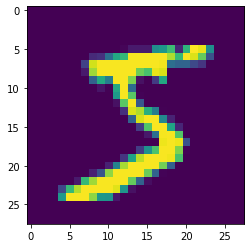

In [22]:
plt.imshow(data_array[0].reshape(28,28))

In [24]:
def plotting(index):
    img = plt.imshow(data_array[index].reshape(28,28))
    return img    

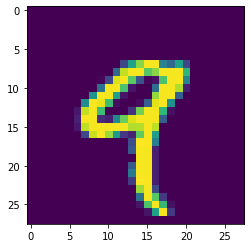

In [32]:
plotting(4)

### train_test_split
* turn off shuffle

In [51]:
# 80% - training dataset and 20% - testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_array, target_array, shuffle = False)

In [53]:
X_train.shape

(52500, 784)

In [54]:
X_test.shape

(17500, 784)

In [55]:
y_train.shape

(52500,)

In [56]:
y_test.shape

(17500,)

### Make a new target array (for only train dataset) that is composed of Boolean values (True for 5s and False for not 5s)
* Name the new array target_array_train_5


In [137]:
target_array_train_5 = y_train == 5
print(target_array_train_5[0:10])
print(y_train[0:10])
target_array_train_5.shape

[ True False False False False False False False False False]
[5 0 4 1 9 2 1 3 1 4]


(52500,)

### StandardScaler

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

### SGDClassifier
* Name it sgd_clf
* Fit the model to the data with the fives target
* Check to see if it worked using the predict function on a specific sample you know is a 5; also a sample you know is not a 5
    * Individual predictions will require a reshape (necessary command will appear in error)


In [79]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter = 1000, tol = 1e-3)
sgd_clf.fit(X_train, target_array_train_5)

SGDClassifier()

In [84]:
from sklearn.linear_model import SGDClassifier
sgd_clf_sc = SGDClassifier(max_iter = 1000, tol = 1e-3)
sgd_clf_sc.fit(X_train_scaled, target_array_train_5)

SGDClassifier()

In [78]:
print(y_test[0:20])

[9 2 6 6 6 1 9 5 0 5 9 8 2 6 6 4 6 4 6 4]


In [71]:
sgd_clf.predict(X_test[9].reshape(1, -1))

array([ True])

### cross_val_score
* Implement it using 3-fold cross validation, scoring for accuracy


In [82]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, target_array_train_5, cv = 3)

array([0.95897143, 0.96754286, 0.95782857])

In [85]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf_sc, X_train_scaled, target_array_train_5, cv = 3)

array([0.9704    , 0.96914286, 0.96537143])

### Calculate the accuracy if the model always predicted not-5


In [97]:
sum(target_array_train_5)
accuracy = ((52500 - 4736)/52500)*100
accuracy

90.97904761904762

In [ ]:
### counter = 0 
### for i, index in enumerate(y_train):
    if index == 5:
        counter += counter
    else:
        continue
print(counter)

### cross_val_predict 
* Name the array of predictions target_array_train_5_pred

In [100]:
from sklearn.model_selection import cross_val_predict
target_array_train_5_pred_sc = cross_val_predict(sgd_clf_sc, X_train_scaled, target_array_train_5, cv = 3)

In [102]:
target_array_train_5_pred_sc.shape

(52500,)

In [150]:
target_array_train_5_pred_bol = cross_val_predict(sgd_clf, X_train, target_array_train_5, cv = 3)
target_array_train_5_pred.shape

(52500,)

### precision_score; recall_score

In [151]:
# Precision = TP/(TP+FP)
TP = np.sum(np.logical_and(target_array_train_5_pred_bol == 1, target_array_train_5 == 1))
TN = np.sum(np.logical_and(target_array_train_5_pred_bol == 0, target_array_train_5 == 0))
FP = np.sum(np.logical_and(target_array_train_5_pred_bol == 1, target_array_train_5 == 0))
FN = np.sum(np.logical_and(target_array_train_5_pred_bol == 0, target_array_train_5 == 1))

In [152]:
# Precision = TP/(TP+FP)
Precision = TP/(TP+FP)
Precision

0.8734576004200577

In [153]:
# Recall/Sensitivity = TP/(TP+FN)
Recall = TP/(TP+FN)
Recall

0.7020468453260181

In [154]:
from sklearn.metrics import recall_score
recall_score(target_array_train_5, target_array_train_5_pred_bol)

0.7020468453260181

In [155]:
from sklearn.metrics import precision_score
precision_score(target_array_train_5, target_array_train_5_pred_bol)

0.8734576004200577

In [156]:
recall_score_sc = recall_score(target_array_train_5, target_array_train_5_pred_sc)
recall_score_sc

0.7676725047478371

In [157]:
precision_score_sc = precision_score(target_array_train_5, target_array_train_5_pred_sc)
precision_score_sc

0.8645437262357415

In [159]:
# f1 score recall support 
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(target_array_train_5, target_array_train_5_pred_bol, average = 'binary')

(0.8734576004200577, 0.7020468453260181, 0.7784277023865231, None)

### roc_curve
* Run cross_val_predict as before, but add method='decision_function'
* Use matplotlib plot to create ROC curve figure

In [130]:
target_array_train_5_pred = cross_val_predict(sgd_clf, X_train, target_array_train_5, method = 'decision_function', cv = 3)
target_array_train_5_pred.shape

(52500,)

In [144]:
print(target_array_train_5_pred[0:10])

[  4040.62508875 -33801.21314135 -32401.02979792 -15069.00458529
 -25441.66006158  -9324.95997775 -10546.33620414 -19869.00353922
  -6260.64031082  -9314.99819744]


In [146]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(target_array_train_5, target_array_train_5_pred)

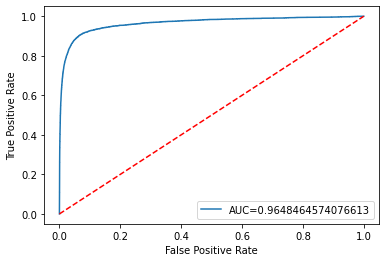

In [163]:
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
#when you have very low FP, you get really high TP; ideally AUC should be 1

### roc_auc_score

In [148]:
auc = metrics.roc_auc_score(target_array_train_5, target_array_train_5_pred)

In [149]:
auc

0.9648464574076613

### Find the cross_val_pred for the SGD classifier using all 10 classes (change targets)
* Use a new variable target_array_train_pred to save predictions 

In [164]:
from sklearn.linear_model import SGDClassifier
sgd_clf_multi = SGDClassifier(max_iter = 1000, tol = 1e-3)
sgd_clf_multi.fit(X_train, y_train)

SGDClassifier()

In [165]:
from sklearn.linear_model import SGDClassifier
sgd_clf_multi.fit(X_train_scaled, y_train)

SGDClassifier()

In [166]:
#cross val score
cross_val_score(sgd_clf_multi, X_train, y_train, cv = 3)

array([0.87931429, 0.84468571, 0.85382857])

In [170]:
#cross val score for scaled data
cross_val_score(sgd_clf_multi, X_train_scaled, y_train, cv = 3)

/Users/kinam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([0.89885714, 0.89725714, 0.9004    ])

In [168]:
#cross_val_predict
target_array_train_pred = cross_val_predict(sgd_clf_multi, X_train, y_train, cv = 3)

In [172]:
#cross_val_predict for scaled data
target_array_train_pred_sc = cross_val_predict(sgd_clf_multi, X_train_scaled, y_train, cv = 3)

/Users/kinam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [169]:
#f1 score
precision_recall_fscore_support(y_train, target_array_train_pred, average = 'macro')

(0.8722878913025062, 0.8703563153783035, 0.8703399550995936, None)

In [173]:
#f1 score for scaled data
precision_recall_fscore_support(y_train, target_array_train_pred_sc, average = 'macro')

(0.904328304961265, 0.8967248186034678, 0.8984287509225706, None)

In [186]:
#confusion matrix
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_train, target_array_train_pred)
matrix

array([[4950,    0,   53,   35,   12,   29,   42,    2,   50,   11],
       [   2, 5654,  112,   42,    6,   14,   11,   35,   59,   13],
       [  38,   21, 4656,  127,   51,   13,  116,   64,   99,   18],
       [  17,   20,  284, 4627,   11,  147,   27,   45,   92,   81],
       [  18,   20,   54,   33, 4530,   17,   74,   21,   91,  231],
       [  89,   20,  100,  322,   79, 3607,  158,   27,  258,   79],
       [  41,    7,   71,   17,   34,   73, 4929,    3,   29,    0],
       [  24,   16,  115,   93,   83,   14,    6, 4675,   55,  368],
       [  48,   95,  245,  371,   74,  168,   72,   18, 3885,  128],
       [  42,   17,   48,  140,  271,   36,    4,  221,  157, 4293]])

In [181]:
#confusion matrix for scaled data
matrix_sc = confusion_matrix(y_train, target_array_train_pred_sc)
print(sc)

[[4875    0   24    5    8   51   35    3  181    2]
 [   1 5649   37   27    4   43    3    6  168   10]
 [  23   26 4581   88   58   26   59   34  297   11]
 [  15   18  110 4584    2  182   22   39  315   64]
 [  11   10   40    7 4535    8   37   17  265  159]
 [  25   18   36  141   47 3898   73   16  415   70]
 [  25   16   34    2   47   85 4880    7  108    0]
 [  14   10   49   27   44   11    4 4937  137  216]
 [  19   59   44   93    4  109   27    8 4695   46]
 [  19   18   25   54  118   29    1  165  289 4511]]


### confusion_matrix

In [177]:
import seaborn as sn

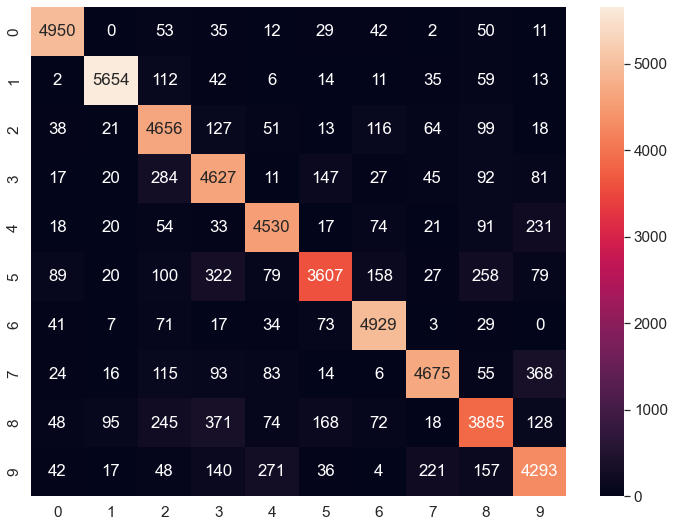

In [188]:
sn.set(font_scale=1.4) # for label size
plt.figure(figsize = (12,9))
sn.heatmap(matrix, annot=True, fmt = "d") # font size
plt.show()

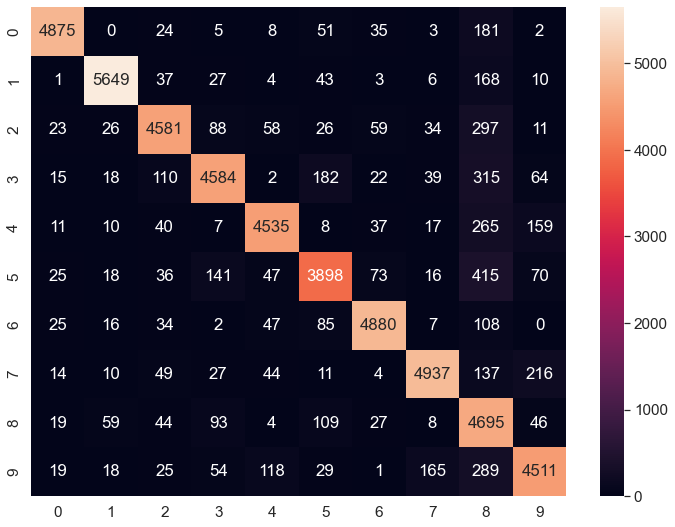

In [189]:
sn.set(font_scale=1.4) # for label size
plt.figure(figsize = (12,9))
sn.heatmap(matrix_sc, annot=True, fmt = "d") # font size
plt.show()

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(target_array_train_5, target_array_train_5_pred.reshape(1,len(target_array_train_5))
plt.show()